# Car Price Prediction

    This notebook will use the Kaggle cardekho data set to model car prices. With a 4 month old child, my wife and I have recently decided we need to upgrade our vehicle to something newer and safer. Given we are novices in the car purchasing world, I would like to explore what factors have the greatest impact on pricing so I can enter the market as a savvy buyer.
    
## Business Question

**What are the greatest factors influencing the price of a vehicle?**
- Use linear regression to fit and score a model to the cardekho dataset
- Get the parameter list in order of explained variability
- Consider the parameter list in how it impacts your buying decision

**Is there a point at which buying a used car no longer makes sense?**

- Model pricing with various loan terms and APRs

In [1]:
# Read in packages necessary
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Read in the cardekho data set
cars_df = pd.read_csv('./cars.csv')
cars_df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
#Check for missingness
np.sum(cars_df.isnull()) > 0

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [15]:
#Row Count
cars_df.shape[0]

4340

In [16]:
#Summary Stats
cars_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
car_types = dict(cars_df['name'].value_counts())

model = 'hyundai'
[key for key in car_types.keys() if model in key.lower()]

['Hyundai EON Era Plus',
 'Hyundai EON Magna Plus',
 'Hyundai i10 Magna',
 'Hyundai Santro Xing GLS',
 'Hyundai Creta 1.6 CRDi SX',
 'Hyundai Verna 1.6 SX',
 'Hyundai Grand i10 1.2 Kappa Magna AT',
 'Hyundai Verna 1.6 SX CRDi (O)',
 'Hyundai Santro GS',
 'Hyundai Grand i10 1.2 Kappa Asta',
 'Hyundai Verna 1.6 VTVT SX',
 'Hyundai Grand i10 Sportz',
 'Hyundai i20 Asta 1.4 CRDi',
 'Hyundai Grand i10 Magna AT',
 'Hyundai i10 Sportz 1.2',
 'Hyundai Santro Xing XG',
 'Hyundai EON 1.0 Era Plus',
 'Hyundai i20 Active 1.2 SX',
 'Hyundai i20 Sportz 1.2',
 'Hyundai i10 Era',
 'Hyundai Santro Xing GL Plus',
 'Hyundai Verna CRDi 1.6 SX Option',
 'Hyundai Santro Xing XL eRLX Euro III',
 'Hyundai Grand i10 1.2 Kappa Sportz BSIV',
 'Hyundai Creta 1.6 CRDi SX Option',
 'Hyundai i20 1.2 Sportz',
 'Hyundai i20 1.4 Sportz',
 'Hyundai Grand i10 CRDi Sportz',
 'Hyundai i20 Active 1.2 S',
 'Hyundai Accent CRDi',
 'Hyundai i20 Asta Option 1.4 CRDi',
 'Hyundai Verna CRDi',
 'Hyundai Grand i10 Asta Option',
 'H

### Explore associations among untransformed variables in cars df

* check correlations
* create viz: boxplots, histograms, etc.
* groupings and transformations

In [7]:
#Correlations between continuous variables
cars_df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


### Check distribution of Sale Price - Histogram
- #### Could need log transformation if skewed

<AxesSubplot:xlabel='log_sellPrice', ylabel='Count'>

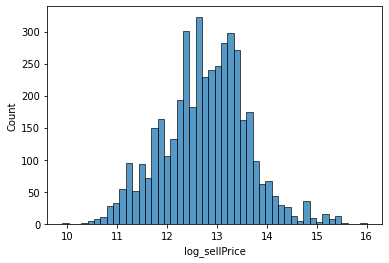

In [8]:
#sns.histplot(cars_df, x='selling_price')

cars_df['log_sellPrice'] = np.log(cars_df['selling_price'])

sns.histplot(cars_df, x='log_sellPrice')